### 1. Data Loading

In [43]:
import pandas as pd

X_train = pd.read_csv('data/house_prices/X_train.csv')
X_test = pd.read_csv('data/house_prices/X_test.csv')
y_train = pd.read_csv('data/house_prices/y_train.csv', header = None)
y_test = pd.read_csv('data/house_prices/y_test.csv', header = None)
X_train.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1054,0,0,3,0,4,1,763,0,2,...,8,0,1,6,936,0,120,1963,1963,2010
1,1120,0,0,3,0,4,4,206,0,0,...,6,0,1,6,1120,0,0,2007,2007,2007
2,1616,0,0,3,0,4,0,0,0,6,...,8,0,1,7,1616,0,208,2005,2005,2006
3,1073,0,0,3,0,4,4,836,0,0,...,8,0,1,6,1073,0,0,1965,1965,2007
4,1389,0,0,2,0,4,0,1071,123,0,...,8,0,1,6,1389,0,240,1974,1975,2006


### 2. Modeling

In [44]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
regressor = SGDRegressor(max_iter=100, 
                         penalty='L2',
                         alpha=0.01,
                         verbose=0)
regressor.fit(X_train_ss, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='L2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [45]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
r2_variance_weighted = r2_score(y_test, y_pred, multioutput='variance_weighted')
r2_uniform_average = r2_score(y_test, y_pred, multioutput='uniform_average')
print('R squared:{:.2f}'.format(r2_uniform_average))
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('root mean square error: {:.2f}'.format(rmse))

R squared:-903009.35
root mean square error: 81420834.98


#### 2.1 Plot Loss Function

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Loss')

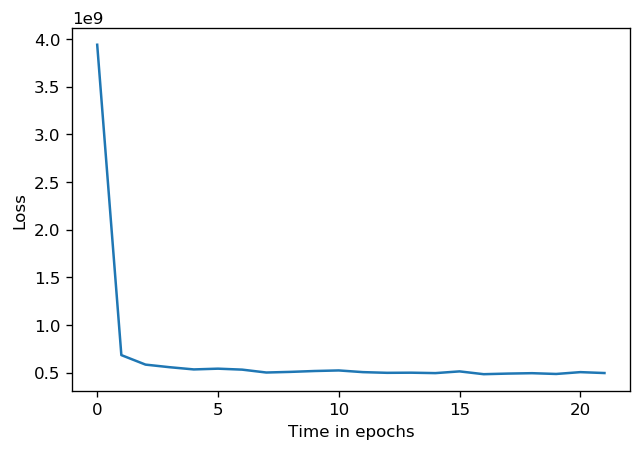

In [46]:
import sys
from io import StringIO 
import matplotlib.pyplot as plt
%matplotlib inline

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
regressor = SGDRegressor(max_iter=100, verbose=1)
regressor.fit(X_train_ss, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure(dpi=120)
plt.plot(np.arange(len(loss_list)), loss_list)
# plt.savefig("warmstart_plots/pure_SGD:"+str(kwargs)+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
# plt.close()